# Imports

In [ ]:
!pip install --upgrade pyalgotrading

In [1]:
from pyalgotrading.algobulls import AlgoBullsConnection

# Connection

In [2]:
connection = AlgoBullsConnection()

In [3]:
connection.get_token_url()

Please login to this URL to get your unique token: https://app.algobulls.com/settings?section=developerOptions


In [4]:
API_TOKEN = "f956df277a83558a768d1d55d1173e35496654b6"
connection.set_access_token(API_TOKEN)

# Strategy Creation

## Import Strategy from pyaglostrategypool

In [ ]:
! wget -O inverse_ema_scalping_crossover.py https://raw.githubusercontent.com/algobulls/pyalgostrataegypool/master/pyalgostrategypool/inverse_ema_scalping.py
! sed -i '1s/^/from pyalgotrading.strategy import StrategyBase\n/' inverse_ema_scalping_crossover.py

In [5]:
from inverse_ema_scalping_crossover import StrategyInverseEMAScalpingRegularOrder as strategy_cls

In [6]:
response = connection.create_strategy(strategy_cls, overwrite=True)
response

{'message': 'Strategy saved successfully',
 'cstcId': 130147,
 'strategyId': '15691d45b50a4cfcae5a6462573d5ba6'}

In [7]:
strategy = response['strategyId']

# Strategy Testing

## Instruments Searching (optional)

In [8]:
instrument = connection.search_instrument('AMZN', exchange='NASDAQ')[0]['value']
instrument

'NASDAQ:AMZN'

## Setup Parameters

In [9]:
vendor_details = {
    'brokerName': 'ALPACAV2',
    'credentialParameters': {
        'CLIENT_API_KEY': 'PKFWEIK28TM4F3NNEYHR', 
        'CLIENT_API_SECRET': '2RaicNUeV8BWIT8qd3S8wOAqMFLwoRESuM37d5tD'
    }
}

In [10]:
# For RT
broking_details = vendor_details
# for our case, vendor and broker both are same - Alpaca

In [11]:
parameters = {
  'SMALLER_TIME_PERIOD': 12,
  'LARGER_TIME_PERIOD': 20,
}

In [12]:
initial_virtual_funds = 4000     # in dollars

## Backtesting

### Start

In [13]:
connection.backtest(
    strategy=strategy, 
    start='2021-08-01 09:15 -0400', 
    end='2023-07-31 15:30 -0400', 
    instrument='NASDAQ:AMZN', 
    lots=15,
    parameters=parameters, 
    candle='1 hour',
    vendor_details=vendor_details,
    initial_funds_virtual=initial_virtual_funds
    
)


Starting the strategy 'Inverse EMA Scalping Regular Order Strategy US' in BACKTESTING mode...
╒═════════════════════════╤═══════════════════════════════════════════════════════╕
│ Config                  │ Value                                                 │
╞═════════════════════════╪═══════════════════════════════════════════════════════╡
│ Vendor Name             │ ALPACAV2                                              │
├─────────────────────────┼───────────────────────────────────────────────────────┤
│ Strategy Name           │ Inverse EMA Scalping Regular Order Strategy US        │
├─────────────────────────┼───────────────────────────────────────────────────────┤
│ Trading Type            │ BACKTESTING                                           │
├─────────────────────────┼───────────────────────────────────────────────────────┤
│ Instrument(s)           │ ['NASDAQ:AMZN']                                       │
├─────────────────────────┼──────────────────────────────────────

### Status

In [14]:
connection.get_backtesting_job_status(strategy)

{'message': 'STOPPED', 'status': 0}

### Logs

In [15]:
logs = connection.get_backtesting_logs(strategy)

In [16]:
print(logs)

[2023-08-22 16:59:37] Performing sanity checks on cfg strategy_parameters, setting up required data structures...
[2023-08-22 16:59:37] Sanity checks on cfg successful.
[2023-08-22 16:59:37] Currency set to "USD"
[2023-08-22 16:59:37] Setting up broker connection...
[2023-08-22 16:59:39] Broker connection has been setup successfully.
[2023-08-22 16:59:39] (NASDAQ_EQ) Funds available in client's ABVIRTUALBROKER account is : USD '4000.00'
[2023-08-22 16:59:39] 
########################################
 INITIALIZING ALGOBULLS CORE (v3.3.0)... 
########################################
[2023-08-22 16:59:39] Welcome ALGOBULLS VIRTUAL USER!
[2023-08-22 16:59:39] Reading strategy...
[2023-08-22 16:59:40] Entering Backtesting mode. Henceforth, all timestamps will be Backtesting timestamps...
[BT] [2021-08-01 09:15:00,000] [INFO] [tls] STARTING ALGOBULLS CORE...
[BT] [2021-08-01 09:15:00,000] [INFO] [tls] 
  #####  #######    #    ######  ####### ### #     #  #####     
 #     #    #      # #   

### Stop

In [17]:
connection.stop_backtesting_job(strategy)

Stopping BACKTESTING job... Success.


## Profit and Loss Reports

In [18]:
pnl_reports = connection.get_backtesting_report_pnl_table(strategy)
pnl_reports

,instrument_segment,instrument_tradingsymbol,entry_timestamp,entry_transaction_type,entry_quantity,entry_currency,entry_price,exit_timestamp,exit_transaction_type,exit_quantity,exit_currency,exit_price,pnl_absolute,pnl_cumulative_absolute
0,NASDAQ,AMZN,2022-06-22 11:30:00-04:00,SELL,15,$,110.10,2022-06-22 15:30:00-04:00,BUY,15,$,109.13,14.55,14.55
1,NASDAQ,AMZN,2022-06-28 12:30:00-04:00,BUY,15,$,108.37,2022-06-28 13:30:00-04:00,SELL,15,$,108.37,0.00,14.55
2,NASDAQ,AMZN,2022-06-28 13:30:00-04:00,BUY,15,$,108.37,2022-06-28 14:30:00-04:00,SELL,15,$,108.37,0.00,14.55
3,NASDAQ,AMZN,2022-06-28 14:30:00-04:00,BUY,15,$,108.37,2022-06-28 15:30:00-04:00,SELL,15,$,108.37,0.00,14.55
4,NASDAQ,AMZN,2022-07-05 11:30:00-04:00,SELL,15,$,110.34,2022-07-05 15:30:00-04:00,BUY,15,$,111.51,-17.55,-3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,NASDAQ,AMZN,2023-07-18 11:30:00-04:00,BUY,15,$,132.13,2023-07-18 15:30:00-04:00,SELL,15,$,132.49,5.40,-32.10
65,NASDAQ,AMZN,2023-07-20 12:30:00-04:00,BUY,15,$,132.02,2023-07-20 13:30:00-04:00,SELL,15,$,132.02,0.00,-32.10
66,NASDAQ,AMZN,2023-07-20 13:30:00-04:00,BUY,15,$,132.02,2023-07-20 14:30:00-04:00,SELL,15,$,132.02,0.00,-32.10
67,NASDAQ,AMZN,2023-07-20 14:30:00-04:00,BUY,15,$,132.02,2023-07-20 15:30:00-04:00,SELL,15,$,132.02,0.00,-32.10


## Statistics Reports

### Statistics

In [19]:
connection.get_backtesting_report_statistics(strategy, initial_funds=initial_virtual_funds)

Generating Statistics for already fetched P&L data...


/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:482: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                    Strategy
------------------  ----------
Start Period        2022-06-22
End Period          2023-07-27
Risk-Free Rate      0.0%
Time in Market      47.0%

Cumulative Return   -1.15%
CAGR﹪              -1.05%

Sharpe              -1.12
Prob. Sharpe Ratio  28.75%
Sortino             -1.62
Sortino/√2          -1.14
Omega               0.75

Max Drawdown        -2.08%
Longest DD Days     234

Gain/Pain Ratio     -0.25
Gain/Pain (1M)      -0.36

Payoff Ratio        1.1
Profit Factor       0.75
Common Sense Ratio  0.52
CPC Index           0.34
Tail Ratio          0.69
Outlier Win Ratio   9.13
Outlier Loss Ratio  2.44

MTD                 0.03%
3M                  -0.04%
6M                  -0.62%
YTD                 -0.67%
1Y                  -0.22%
3Y (ann.)           -1.05%
5Y (ann.)           -1.05%
10Y (ann.)          -1.05%
All-time (ann.)     -1.05%

Avg. Drawdown       -1.68%
Avg. Drawdown Days  173
Recovery Factor     -0.55
Ulcer Index         0.01
Serenity Index  

### Quantstats Full Report

Generating Statistics for already fetched P&L data...


/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:482: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                           Strategy
-------------------------  ----------
Start Period               2022-06-22
End Period                 2023-07-27
Risk-Free Rate             0.0%
Time in Market             47.0%

Cumulative Return          -1.15%
CAGR﹪                     -1.05%

Sharpe                     -1.12
Prob. Sharpe Ratio         28.75%
Smart Sharpe               -1.06
Sortino                    -1.62
Smart Sortino              -1.52
Sortino/√2                 -1.14
Smart Sortino/√2           -1.08
Omega                      0.75

Max Drawdown               -2.08%
Longest DD Days            234
Volatility (ann.)          3.7%
Calmar                     -0.51
Skew                       1.05
Kurtosis                   8.15

Expected Daily %           -0.02%
Expected Monthly %         -0.09%
Expected Yearly %          -0.58%
Kelly Criterion            -13.18%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.4%
Expected Shortfall (cVaR)  -0.4%

Max Consecutive Wins

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2022-12-05,2023-06-29,2023-07-27,234,-2.084985,-2.070119
2,2022-07-05,2022-08-26,2022-10-26,112,-1.274115,-1.206860


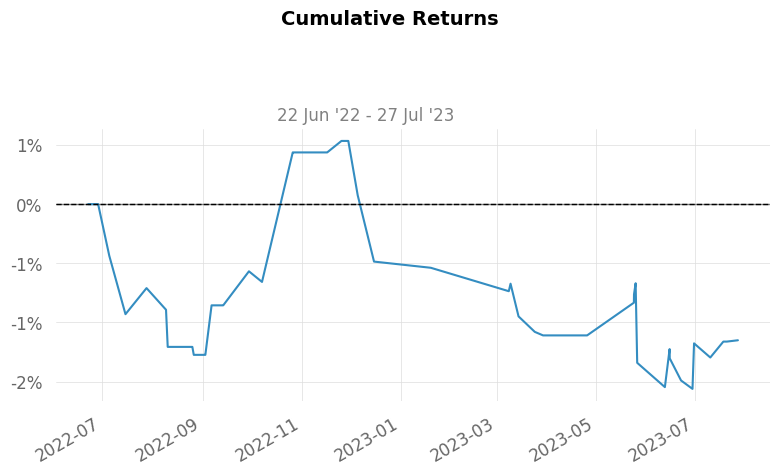

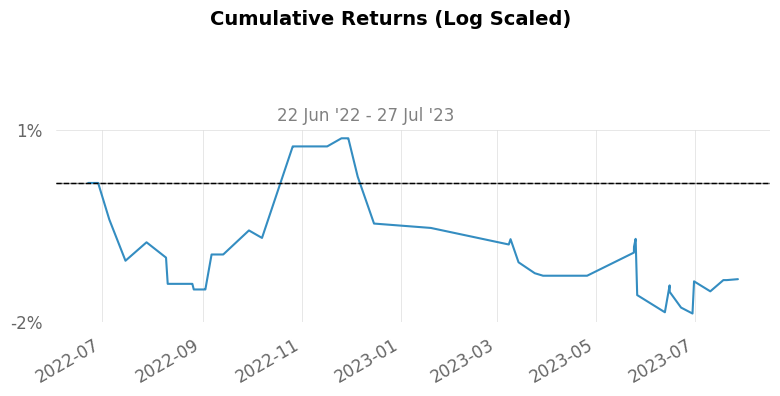

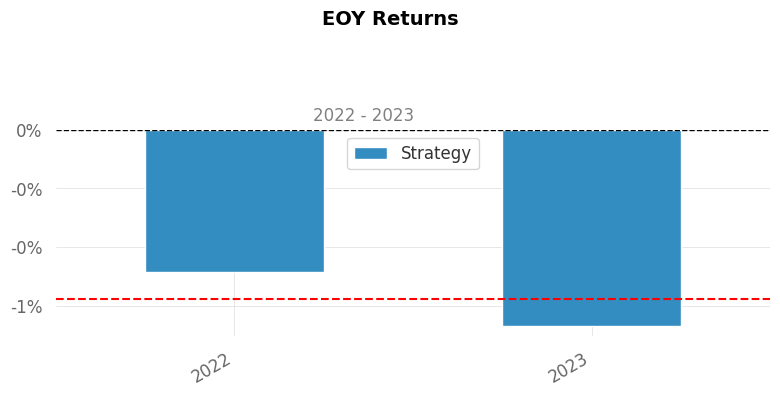

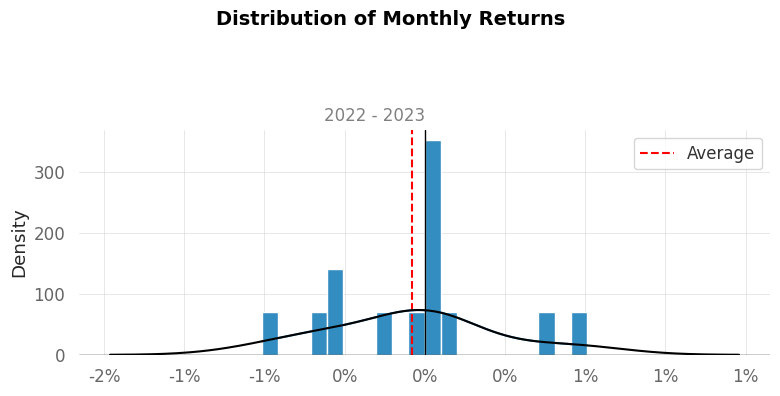

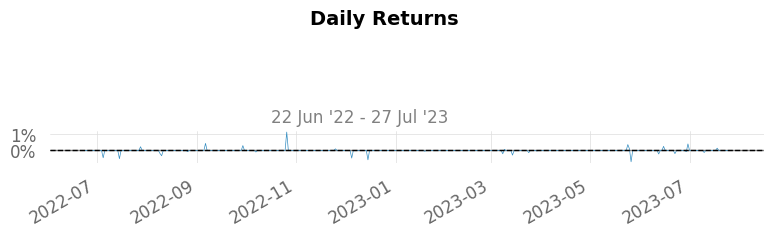

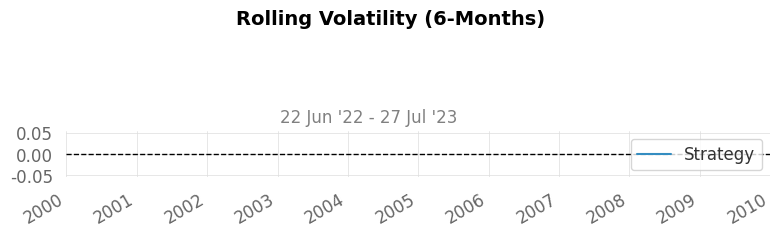

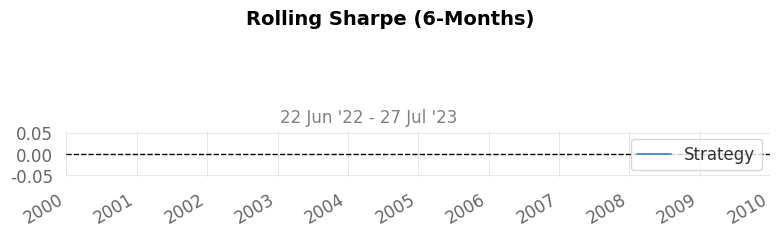

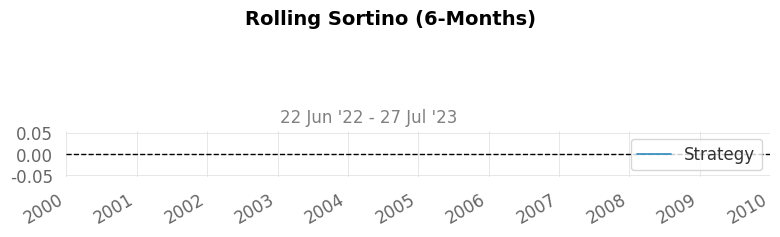

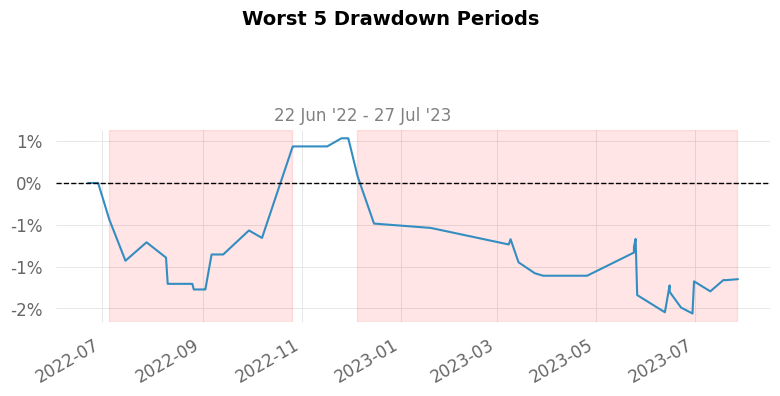

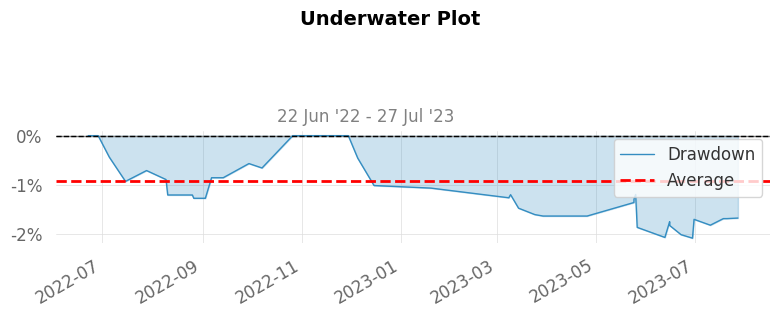

/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


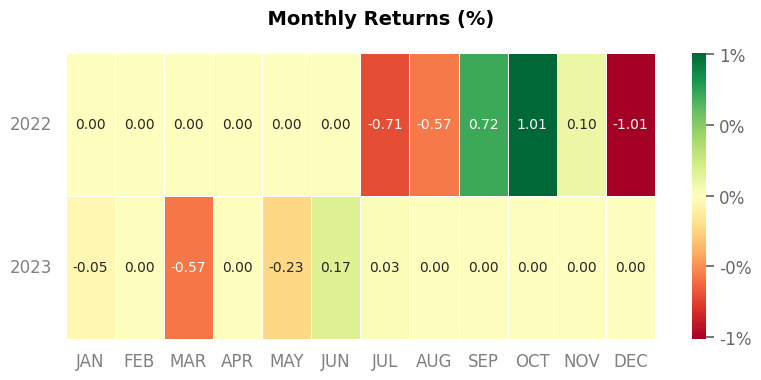

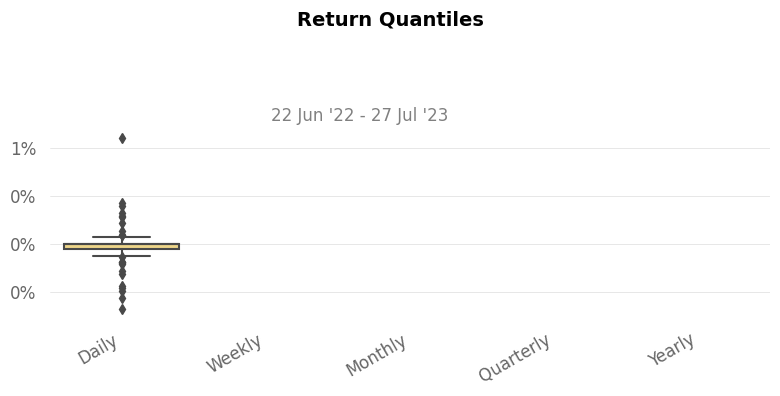

/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


In [20]:
connection.get_backtesting_report_statistics(strategy, mode='quantstats', report='full', html_dump=True, initial_funds=initial_virtual_funds)

## Order History

In [21]:
order_history = connection.get_backtesting_report_order_history(strategy)
print(order_history)



+----------------+---------------------------+----------------------------------+------+
| INST           | TIME                      | ID                               | TT   |
|----------------+---------------------------+----------------------------------+------|
| NASDAQ_EQ:AMZN | 2022-06-22 11:30:00-04:00 | 9f48798690d843bd805e44a78e704023 | SELL |
+----------------+---------------------------+----------------------------------+------+
+----+----------------------------------+------------------------+-------+
|    | TIME                             | STATE                  | MSG   |
|----+----------------------------------+------------------------+-------|
|  0 | 2022-06-22 11:30:00.500000-04:00 | PUT ORDER REQ RECEIVED |       |
|  1 | 2022-06-22 11:30:00.500000-04:00 | VALIDATION PENDING     |       |
|  2 | 2022-06-22 11:30:00.500000-04:00 | OPEN PENDING           |       |
|  3 | 2022-06-22 11:30:00.500000-04:00 | OPEN                   |       |
|  4 | 2022-06-22 11:30:00.5

## Papertrading

### Start

In [ ]:
connection.papertrade(
    strategy=strategy, 
    start='9:15 -0400', 
    end='15:00 -0400',  
    instruments='NASDAQ:AMZN', 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
    vendor_details=vendor_details
)

### Status

In [ ]:
connection.get_papertrading_job_status(strategy)

### Logs

In [ ]:
logs = connection.get_papertrading_logs(strategy)
print(logs)

### Stop

In [ ]:
connection.stop_papertrading_job(strategy)

### Profit and Loss Reports (Paper Trading)

In [ ]:
pnl_reports = connection.get_papertrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Paper Trading)

#### Statistics

In [ ]:
connection.get_papertrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_papertrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)

### Order History (Papertrading)

In [ ]:
order_history = connection.get_papertrading_report_order_history(strategy)
print(order_history)

## Live Trading (Real Trading)

### Start

In [22]:
connection.realtrade(
    strategy=strategy, 
    start='9:00 -0400', 
    end='15:30 -0400', 
    instruments='NASDAQ:AMZN', 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
    broking_id=73,
    broking_details=broking_details
)


Starting the strategy 'Inverse EMA Scalping Regular Order Strategy US' in REALTRADING mode...
╒═════════════════╤═══════════════════════════════════════════════════════╕
│ Config          │ Value                                                 │
╞═════════════════╪═══════════════════════════════════════════════════════╡
│ Vendor Name     │ ALPACAV2                                              │
├─────────────────┼───────────────────────────────────────────────────────┤
│ Broker Name     │ ALPACAV2                                              │
├─────────────────┼───────────────────────────────────────────────────────┤
│ Strategy Name   │ Inverse EMA Scalping Regular Order Strategy US        │
├─────────────────┼───────────────────────────────────────────────────────┤
│ Trading Type    │ REALTRADING                                           │
├─────────────────┼───────────────────────────────────────────────────────┤
│ Instrument(s)   │ ['NASDAQ:AMZN']                                  

### Status

In [23]:
connection.get_realtrading_job_status(strategy)

{'message': 'STARTING', 'status': 1}

### Logs

In [24]:
logs = connection.get_realtrading_logs(strategy)
print(logs)

[2023-08-22 20:19:11] Performing sanity checks on cfg strategy_parameters, setting up required data structures...
[2023-08-22 20:19:11] Sanity checks on cfg successful.
[2023-08-22 20:19:11] Currency set to "USD"
[2023-08-22 20:19:11] Setting up broker connection...
[2023-08-22 20:19:13] Broker connection has been setup successfully.
[2023-08-22 20:19:13] (NASDAQ_EQ) Funds available in client's ALPACAV2 account is : USD '3839600.76'
[2023-08-22 20:19:13] [QUERYING] Sanity check: Ensuring all instruments are affordable...
[2023-08-22 20:19:14] [PASSED] Sanity check: All instruments are affordable
[2023-08-22 20:19:14] 
########################################
 INITIALIZING ALGOBULLS CORE (v3.3.0)... 
########################################
[2023-08-22 20:19:14] Welcome PA327K1V17PK!
[2023-08-22 20:19:14] Reading strategy...
[2023-08-22 20:19:15] Entering Realtrading mode. Henceforth, all timestamps will be Realtrading timestamps...
[2023-08-22 10:49:15,928] [INFO] [tls] STARTING ALGOBU

### Stop

In [ ]:
connection.stop_realtrading_job(strategy)

### Profit and Loss Reports (Live Trading)

In [ ]:
pnl_reports = connection.get_realtrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Live Trading)

#### Statistics

In [ ]:
connection.get_realtrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_realtrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)